In [315]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

print(f"Torch Version : {torch.__version__} and Torchvision Version : {torchvision.__version__}")

Torch Version : 2.2.1+cu121 and Torchvision Version : 0.17.1+cu121


# Get Dataset

In [316]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [317]:
print(type(train_data))

train_data

<class 'torchvision.datasets.mnist.FashionMNIST'>


Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [318]:
image , label = train_data[0]

In [319]:
image , label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [320]:
image.shape , label

(torch.Size([1, 28, 28]), 9)

In [321]:
image.dtype

torch.float32

In [322]:
type(label)

int

In [323]:
len(train_data.data) , len(train_data.targets) , len(test_data.data) , len(test_data.targets)

(60000, 60000, 10000, 10000)

In [324]:
class_names = train_data.classes
class_names


['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

# Visualizations






Image Shape : torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

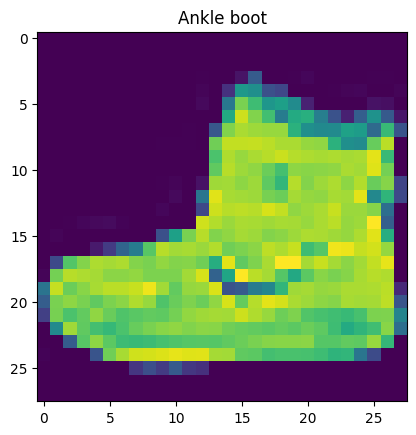

In [325]:
image , label = train_data[0]
print(f"Image Shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

Text(0.5, 1.0, 'Ankle boot')

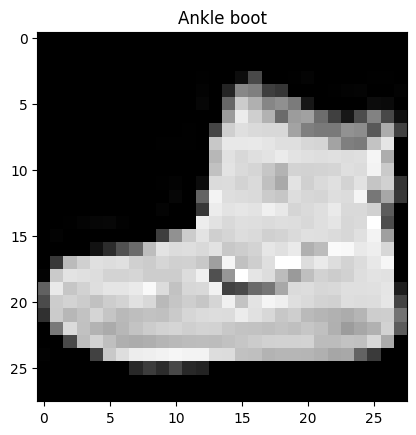

In [326]:
plt.imshow(image.squeeze() , cmap = "gray")
plt.title(class_names[label])

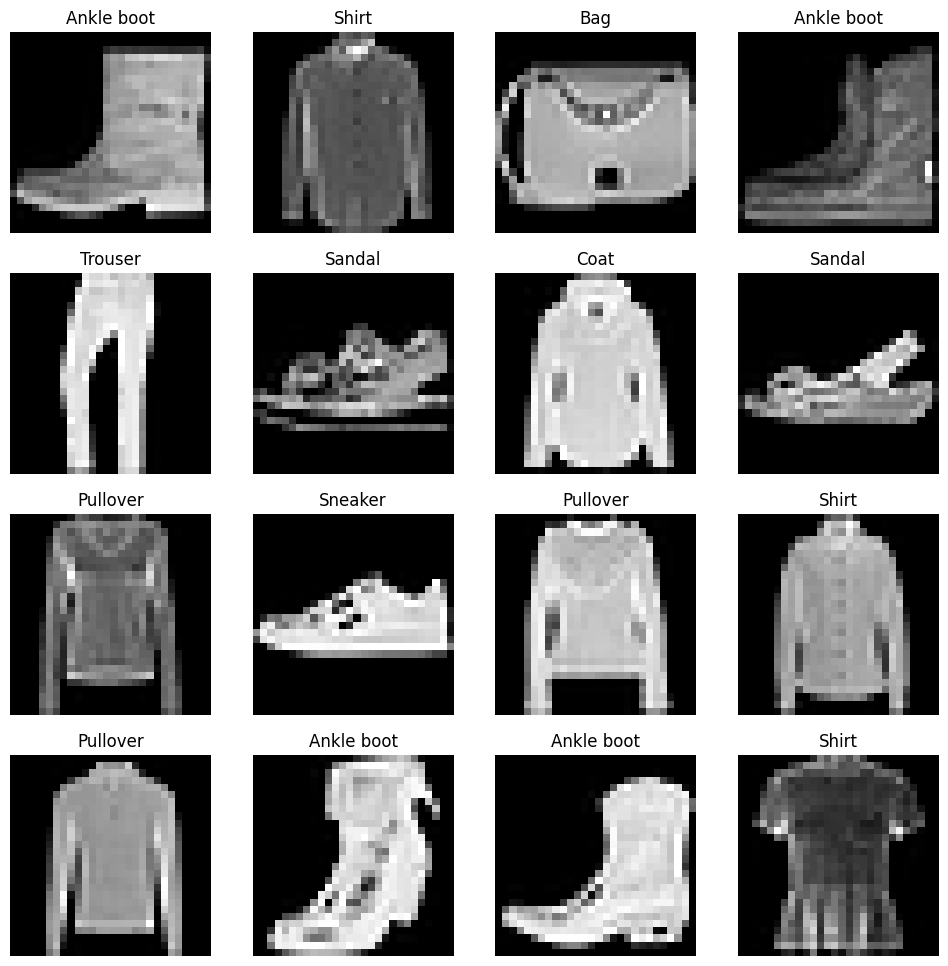

In [327]:
plt.figure(figsize=(12 , 12))
torch.manual_seed(42)

for i in range(16):
  plt.subplot(4 , 4 , i +1)
  random_idx = torch.randint(0 , len(train_data) , size = [1]).item()
  image , label = train_data[random_idx]
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis("off")

# Prepare DataLoader

In [328]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)

test_dataloader = DataLoader(test_data,
                             batch_size = BATCH_SIZE ,
                             shuffle = True)

print(f"DataLoaders : {train_dataloader} and {test_dataloader}")
print(f"Training data now has {len(train_dataloader)} batches of size { BATCH_SIZE}")
print(f"Testing data now has {len(test_dataloader)} batches of size {BATCH_SIZE}")

DataLoaders : <torch.utils.data.dataloader.DataLoader object at 0x7c8882da1e70> and <torch.utils.data.dataloader.DataLoader object at 0x7c8882da0d60>
Training data now has 1875 batches of size 32
Testing data now has 313 batches of size 32


In [329]:
train_features_batch , train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape , train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

(-0.5, 27.5, 27.5, -0.5)

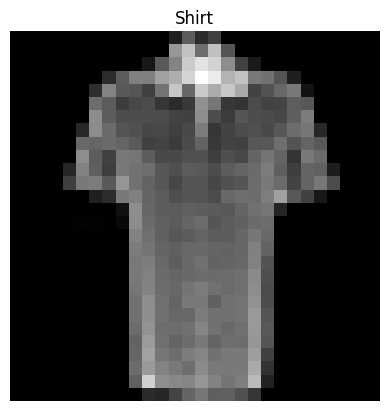

In [330]:
torch.manual_seed(42)

random_idx = torch.randint( 0 , len(train_features_batch) , size=[1]).item()
image , label = train_features_batch[random_idx] , train_labels_batch[random_idx]
plt.imshow(image.squeeze() , cmap="gray")
plt.title(class_names[label])
plt.axis('off')

In [331]:
flatten_layer = nn.Flatten()

x = train_features_batch[0]

output = flatten_layer(x)

print(f"Shape before flattening : {x.shape}")
print(f"Shape after flattening : {output.shape}")

Shape before flattening : torch.Size([1, 28, 28])
Shape after flattening : torch.Size([1, 784])


# Model_0

In [332]:
class FashionMNISTV0(nn.Module):
  def __init__(self, input_shape : int , hidden_units : int , output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = input_shape , out_features = hidden_units),
        nn.Linear(in_features = hidden_units , out_features = output_shape)
    )

  def forward (self , x):
    return self.layer_stack(x)

In [333]:
torch.manual_seed(42)

model_0 = FashionMNISTV0(input_shape = 784 ,
                         hidden_units = 10,
                         output_shape = len(class_names)).to("cpu")

In [334]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print(f"help_functions.py already exists , skipping download")
else:
  print(f"Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py" , "wb") as f:
    f.write(request.content)

help_functions.py already exists , skipping download


In [335]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_0.parameters(),
                            lr = 0.1)

In [336]:
from timeit import default_timer as timer

def print_train_time(start : float , stop : float , device : torch.device = None):
  total_time = stop-start
  print(f"Time taken to train on {device} is {total_time:.3f} seconds")
  return total_time

In [337]:
from tqdm.auto import tqdm

torch.manual_seed(42)
train_time_start_on_cpu = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}")
  train_loss = 0
  for batch , (X , y) in enumerate(train_dataloader):
    model_0.train()
    y_preds = model_0(X)
    loss = loss_fn(y_preds , y)

    train_loss += loss

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    if batch % 400 ==0:
      print(f"Looked at {batch * len(X)} / {len(train_dataloader.dataset)} samples")

  train_loss /= len(train_dataloader)

  test_loss  , test_acc = 0 , 0
  model_0.eval()
  with torch.inference_mode():
    for X , y in test_dataloader:
      test_preds = model_0(X)
      test_loss += loss_fn(test_preds , y)
      test_acc += accuracy_fn(y_true = y ,
                              y_pred = test_preds.argmax(dim=1))

    test_loss /= len(test_dataloader)
    test_acc /= len(test_dataloader)

  print(f"Train Loss : {train_loss} , Test Loss : {test_loss} , Test Acc : {test_acc}")

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu,
                                            stop = train_time_end_on_cpu,
                                            device = str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss : 0.5903892517089844 , Test Loss : 0.5101593732833862 , Test Acc : 82.03873801916933
Epoch : 1
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss : 0.4743497967720032 , Test Loss : 0.5267699360847473 , Test Acc : 81.67931309904154
Epoch : 2
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples
Train Loss : 0.45367076992988586 , Test Loss : 0.5126373171806335 , Test Acc : 82.99720447284345
Time taken to train on cpu is 35.993 seconds


In [338]:
torch.manual_seed(42)

def eval_model(model: torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               accuracy_fn):
  loss , acc = 0 , 0
  model.eval()
  with torch.inference_mode():
    for X , y in dataloader:
      preds = model(X)

      loss += loss_fn(preds , y)
      acc += accuracy_fn(y_true = y,
                        y_pred = preds.argmax(dim=1))

    loss /= len(dataloader)
    acc /= len(dataloader)

    return {
        "model_name" : model.__class__.__name__,
        "model_loss" : loss.item(),
        "model_accuracy" : acc
    }

In [339]:
model_0_results = eval_model(model_0 , test_dataloader , loss_fn , accuracy_fn)

model_0_results

{'model_name': 'FashionMNISTV0',
 'model_loss': 0.5119838118553162,
 'model_accuracy': 83.02715654952077}

In [340]:
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

# Model_1

In [341]:
class FashionMNISTModelV1(nn.Module):

  def __init__(self , input_shape : int , hidden_units : int , output_shape : int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = 784 , out_features = hidden_units),
        nn.ReLU(),
        nn.Linear(in_features = 10 , out_features = output_shape),
        nn.ReLU()
    )

  def forward(self , x):
    return self.layer_stack(x)

In [342]:
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape = 784 ,
                              hidden_units = 10 ,
                              output_shape = len(class_names)).to(device)

str(next(model_1.parameters()).device)

'cpu'

In [343]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_1.parameters(),
                            lr = 0.1)

In [344]:
def train_step(model : torch.nn.Module,
               dataloader : torch.utils.data.DataLoader,
               loss_fn : torch.nn.Module,
               optimizer : torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
  model.train()
  train_loss , train_acc = 0 , 0
  model.to(device)
  for batch ,  (X , y ) in enumerate(dataloader):
    X , y = X.to(device) , y.to(device)

    y_preds = model(X)
    loss = loss_fn(y_preds , y)
    train_loss += loss
    train_acc += accuracy_fn(y_true = y,
                             y_pred = y_preds.argmax(dim=1))
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

  train_loss /= len(dataloader)
  train_acc /= len(dataloader)
  print(f"Train Loss : {train_loss} , Train Acc : {train_acc}")

def test_step(model : torch.nn.Module,
              dataloader : torch.utils.data.DataLoader,
              loss_fn : torch.nn.Module,
              optimizer : torch.optim.Optimizer,
              accuracy_fn,
              device : torch.device = device):
  test_loss , test_acc = 0 , 0
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for X , y in dataloader:
      X , y = X.to(device) , y.to(device)
      test_pred= model(X)

      test_loss += loss_fn(test_pred , y)
      test_acc += accuracy_fn(y_true = y ,
                              y_pred = test_pred.argmax(dim=1))

    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    print(f"Test Loss : {test_loss} , Test Acc : {test_acc}")

In [345]:
torch.manual_seed(42)

from timeit import default_timer as timer
train_start_time_on_cpu = timer()
epochs = 3

for epoch in tqdm(range(epochs)):
  print(f"Epoch : {epoch}")

  train_step(
      model = model_1,
      dataloader = train_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn  = accuracy_fn,

  )

  test_step(
      model = model_1,
      dataloader = test_dataloader,
      loss_fn = loss_fn,
      optimizer = optimizer,
      accuracy_fn = accuracy_fn
  )
train_time_end_on_cpu = timer()

total_train_time_model_1 = print_train_time(start = train_start_time_on_cpu,
                 stop = train_time_end_on_cpu,
                 device= device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : 0
Train Loss : 1.0919920206069946 , Train Acc : 61.343333333333334
Test Loss : 0.9569015502929688 , Test Acc : 64.97603833865814
Epoch : 1
Train Loss : 0.737794816493988 , Train Acc : 73.69333333333333
Test Loss : 0.7238787412643433 , Test Acc : 74.21126198083067
Epoch : 2
Train Loss : 0.6677614450454712 , Train Acc : 76.07666666666667
Test Loss : 0.6875132322311401 , Test Acc : 75.63897763578275
Time taken to train on cpu is 41.899 seconds


In [346]:
torch.manual_seed(42)

model_1_results = eval_model(model = model_1,
                             dataloader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6873756051063538,
 'model_accuracy': 75.64896166134186}

# Model_2

In [347]:
class FashionMNISTV2(nn.Module):

  def __init__(self , input_shape : int , hidden_units : int , output_shape : int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels =hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2,
                     stride = 2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1 ,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units ,
                  out_channels = hidden_units ,
                  kernel_size = 3,
                  stride = 1 ,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features = hidden_units*7*7,
                  out_features = len(class_names))
    )

  def forward(self , x : torch.Tensor):
    x = self.block_1(x)
    x = self.block_2(x)
    return self.classifier(x)


In [348]:
model_2 = FashionMNISTV2(input_shape =1,
                         hidden_units =10,
                         output_shape = len(class_names))

model_2.to(device)

FashionMNISTV2(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [349]:
images = torch.randn(size=(32 , 3 , 64 , 64))
image = images[0]
print(f"Images Shape : {images.shape}")
print(f"Single Image Shape : {image.shape}")
print(f"Singel Image Values : {image}")

Images Shape : torch.Size([32, 3, 64, 64])
Single Image Shape : torch.Size([3, 64, 64])
Singel Image Values : tensor([[[ 0.5184, -0.4835,  1.3702,  ...,  0.7626,  0.6962,  0.4409],
         [-0.1587,  1.6984, -0.0560,  ...,  1.5168, -0.6101, -1.8375],
         [ 1.1845,  1.3882,  0.1371,  ...,  0.1716,  0.8127, -0.6369],
         ...,
         [-1.1657,  0.9033,  0.9482,  ..., -0.6882,  1.3237, -0.4752],
         [-1.6497, -1.2339, -0.5187,  ...,  0.0425, -1.9322,  0.6070],
         [ 0.1320, -1.0045,  0.1248,  ..., -0.7290, -0.2637,  0.0630]],

        [[ 0.1219,  0.2363, -0.2562,  ..., -0.6141, -1.3034,  0.4951],
         [ 0.6750,  1.4768, -1.3465,  ...,  0.1794,  0.5194, -0.2064],
         [-1.3900, -2.8329, -1.0754,  ...,  1.1391, -0.6059, -0.7973],
         ...,
         [-1.0219, -0.5758,  0.8295,  ...,  0.8811, -0.7469, -0.2217],
         [ 0.7823, -0.9318,  2.7222,  ..., -0.3366,  2.1981, -0.6422],
         [ 1.0921,  0.8597,  1.5317,  ...,  0.9314,  1.3788, -1.6628]],

      

In [350]:
torch.manual_seed(42)

conv_layer = nn.Conv2d(in_channels = 3 ,
                       out_channels = 10 ,
                       kernel_size = 3 ,
                       stride = 1 ,
                       padding = 'same')

conv_layer(image).shape

torch.Size([10, 64, 64])

In [351]:
print(f"Conv Layer weights shape : {conv_layer.weight.shape}")
print(f"Conv Layer bias shape : {conv_layer.bias.shape}")

Conv Layer weights shape : torch.Size([10, 3, 3, 3])
Conv Layer bias shape : torch.Size([10])


In [352]:
conv_layer.state_dict()

OrderedDict([('weight',
              tensor([[[[ 0.1471,  0.1597, -0.0451],
                        [ 0.1768, -0.0422,  0.0388],
                        [-0.0937,  0.1130,  0.1697]],
              
                       [[-0.1412,  0.1673,  0.0360],
                        [ 0.1422,  0.0261,  0.0928],
                        [-0.0272,  0.1484,  0.0284]],
              
                       [[-0.0898,  0.0491, -0.0887],
                        [-0.0226, -0.0782,  0.1277],
                        [-0.1519, -0.0887, -0.0543]]],
              
              
                      [[[-0.1157,  0.0182, -0.1901],
                        [ 0.1738, -0.1635,  0.1486],
                        [ 0.0320, -0.0625,  0.1189]],
              
                       [[ 0.0300,  0.1555,  0.0210],
                        [-0.0607,  0.0517, -0.0522],
                        [ 0.0810,  0.1718,  0.1112]],
              
                       [[-0.0841,  0.1111,  0.0344],
                        [ 0.0977

In [353]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model_2.parameters(),
                            lr = 0.1)

In [354]:
torch.manual_seed(42)

from timeit import default_timer as timer

train_time_start_model_2 = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
  print("Epoch : {epoch } \n")
  train_step(model= model_2,
             dataloader = train_dataloader,
             loss_fn = loss_fn,
             optimizer = optimizer,
             accuracy_fn = accuracy_fn,
             device = device)
  test_step(model = model_2,
            dataloader = test_dataloader,
            loss_fn = loss_fn,
            optimizer = optimizer ,
            accuracy_fn = accuracy_fn,
            device = device)
train_time_end_model_2 = timer()
train_time_model_2 = print_train_time(start = train_time_start_model_2,
                                      stop = train_time_end_model_2,
                                      device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch : {epoch } 

Train Loss : 0.6838316321372986 , Train Acc : 75.165
Test Loss : 0.3915849030017853 , Test Acc : 86.14217252396166
Epoch : {epoch } 

Train Loss : 0.3583664894104004 , Train Acc : 86.96833333333333
Test Loss : 0.45724064111709595 , Test Acc : 83.6261980830671
Epoch : {epoch } 

Train Loss : 0.32543307542800903 , Train Acc : 88.30166666666666
Test Loss : 0.337765634059906 , Test Acc : 88.14896166134186
Time taken to train on cpu is 196.323 seconds


In [355]:
model_2_results = eval_model(model = model_2,
                             dataloader = test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn = accuracy_fn)

In [356]:
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.33725425601005554,
 'model_accuracy': 88.16892971246007}

In [357]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results , model_1_results ,model_2_results])
compare_results


,model_name,model_loss,model_accuracy
0,FashionMNISTV0,0.511984,83.027157
1,FashionMNISTModelV1,0.687376,75.648962
2,FashionMNISTV2,0.337254,88.168930


In [358]:
compare_results['training_time'] = [total_train_time_model_0 , total_train_time_model_1 , train_time_model_2]
compare_results

,model_name,model_loss,model_accuracy,training_time
0,FashionMNISTV0,0.511984,83.027157,35.993354
1,FashionMNISTModelV1,0.687376,75.648962,41.899495
2,FashionMNISTV2,0.337254,88.168930,196.322836


Text(0, 0.5, 'Model')

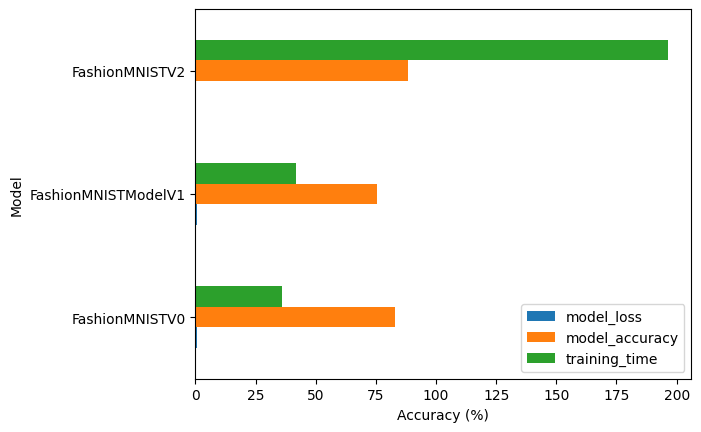

In [359]:
compare_results.set_index('model_name').plot(kind='barh')
plt.xlabel('Accuracy (%)')
plt.ylabel('Model')

In [360]:
def make_predictions(model : torch.nn.Module,
                     data : list ,
                     device : torch.device = device):
  pred_probs  = []
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim =0).to(device)

      pred_logits = model(sample)
      pred_prob = torch.softmax(pred_logits.squeeze() , dim=0)

      pred_probs.append(pred_prob.cpu())

  return torch.stack(pred_probs)

In [361]:
torch.manual_seed(42)
import random

test_samples = []
test_labels = []
for image, label in random.sample(list(test_data) , k =9):
  test_samples.append(image)
  test_labels.append(label)

print(f"Test Sample Image Shape : {test_samples[0].shape} , Test Label : {test_labels[0]} ({class_names[test_labels[0]]})")

Test Sample Image Shape : torch.Size([1, 28, 28]) , Test Label : 9 (Ankle boot)


In [362]:
pred_probs = make_predictions(model = model_2,
                              data = test_samples)
pred_probs[:2]

tensor([[3.8411e-06, 1.4939e-07, 3.3421e-06, 3.7257e-07, 3.9409e-07, 1.0632e-03,
         1.4513e-06, 5.6034e-03, 4.6547e-04, 9.9286e-01],
        [1.7696e-02, 5.7940e-04, 6.6524e-01, 1.2085e-03, 2.3979e-01, 4.4108e-05,
         5.9166e-02, 9.0295e-06, 1.6064e-02, 2.0646e-04]])

In [363]:
pred_classes =pred_probs.argmax(dim=1)
pred_classes[:2]

tensor([9, 2])

In [364]:
pred_classes[:10] , test_labels[:10]

(tensor([9, 2, 6, 6, 1, 0, 7, 4, 5]), [9, 2, 6, 6, 1, 0, 7, 4, 5])

In [365]:
test_samples[0].shape , test_labels[0]

(torch.Size([1, 28, 28]), 9)

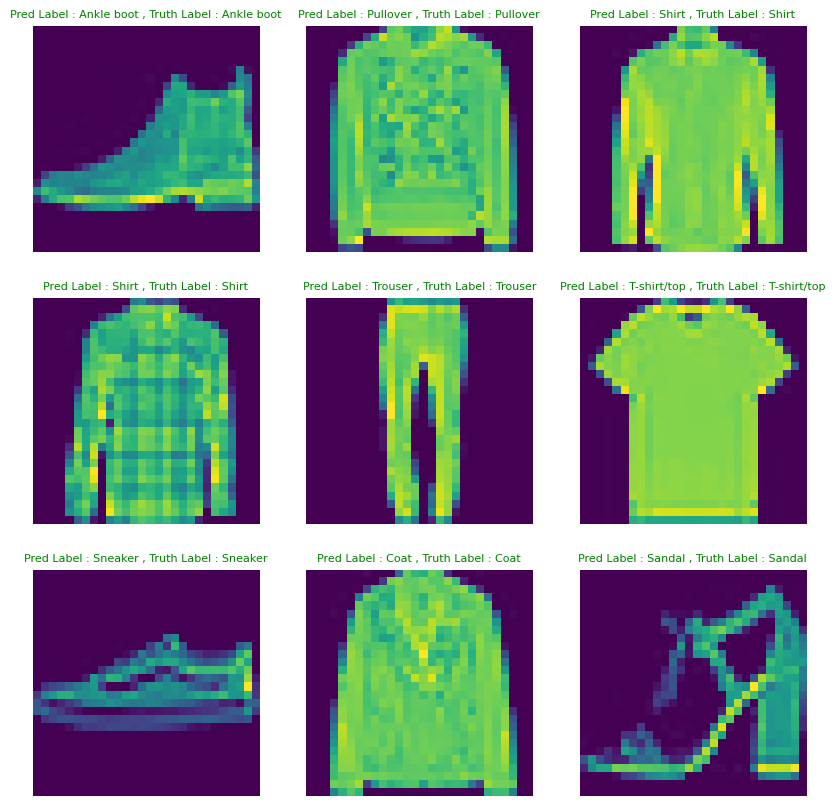

In [366]:
plt.figure(figsize=(10,10))

for i , sample in enumerate(test_samples):
  plt.subplot(3 , 3 , i +1)

  plt.imshow(sample.squeeze())

  pred_label = pred_classes[i]
  truth_label = test_labels[i]

  title_text = f"Pred Label : {class_names[pred_label]} , Truth Label : {class_names[truth_label]}"

  if pred_label == truth_label:
    plt.title(title_text , fontsize = 8 ,c='g')
  else:
    plt.title(title_text , fontsize = 8, c='r')
  plt.axis("off")

In [367]:
from tqdm.auto import tqdm
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X , y in tqdm(test_dataloader ,desc = 'Making predictions'):
    X , y = X.to(device) , y.to(device)

    y_logits = model_2(X)
    y_pred = torch.softmax(y_logits , dim =1).argmax(dim=1)
    y_preds.append(y_pred.cpu())


Making predictions:   0%|          | 0/313 [00:00<?, ?it/s]

In [368]:
y_preds_tensor = torch.cat(y_preds)

In [369]:
!pip install torchmetrics mlxtend

In [370]:
import torchmetrics , mlxtend
print(f"torchmetrics version : {torchmetrics.__version__} , mlxtend version : {mlxtend.__version__}")

torchmetrics version : 1.3.2 , mlxtend version : 0.22.0


In [371]:
acc = accuracy_fn(y_true = test_data.targets,
                  y_pred = y_preds_tensor)
acc

10.209999999999999

In [372]:
# from torchmetrics import ConfusionMatrix
# from mlxtend.plotting import plot_confusion_matrix

# confmat = ConfusionMatrix(num_classes=len(class_names) , task = 'multiclass')
# confmat_tensor = confmat(preds = y_preds_tensor,
#                          target = test_data.targets)

# fig , ax = plot_confusion_matrix(
#     conf_mat = confmat_tensor.numpy(),
#     class_names = class_names,
#     figsize = (10 ,7)
# )

In [373]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)
MODEL_NAME = "model_2.pt"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj = model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to models/model_2.pt


In [374]:
loaded_model_2 = FashionMNISTV2(1 , 10 , len(class_names))
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [375]:
torch.manual_seed(42)
loaded_model_2_results = eval_model(model = loaded_model_2,
                                    dataloader = test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn)
loaded_model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.33710017800331116,
 'model_accuracy': 88.17891373801918}

In [376]:
model_2_results

{'model_name': 'FashionMNISTV2',
 'model_loss': 0.33725425601005554,
 'model_accuracy': 88.16892971246007}